In [5]:
import matplotlib.pyplot as plt
import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)
from matplotlib.ticker import MaxNLocator

import numpy as np
import pandas as pd
from tqdm import tqdm

import tensorflow as tf

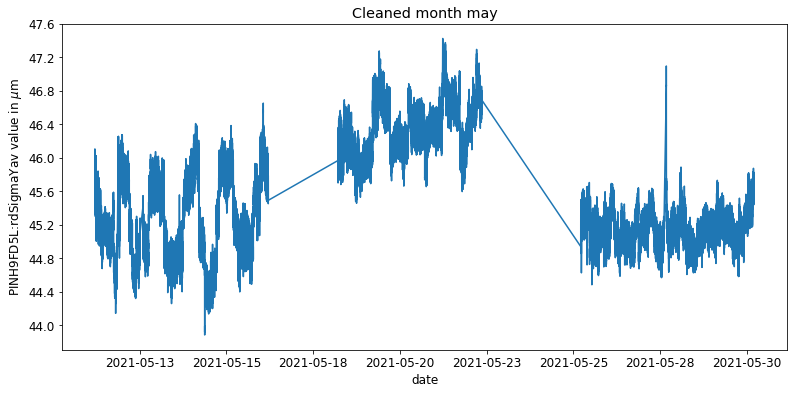

In [10]:
df=pd.read_pickle(f"cleaned_Month_2021_number_{5}_to_{6}.pkl")      # dataset needs to be generated under
                                                                    # data_cleaning.ipynb
plt.figure(figsize=(13,6))
plt.plot(df["PINH9FD5L:rdSigmaYav"])
plt.title("Cleaned month may")
plt.ylabel("PINH9FD5L:rdSigmaYav value in $\mu$m")
plt.xlabel("date")
plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))   #avoid overlapping x and y labels
plt.gca().yaxis.set_major_locator(MaxNLocator(prune='lower'))


In [11]:
#copied from https://github.com/malhamid/LSTM/blob/main/LSTM.ipynb

def create_sequence(dataset, length):
    # prepares the dataset for the LSTM training. 
    # the dataset has the form (x_1,\dots,x_N)
    # which will now be transfered to 
    # [(x_1,...,x_length),(x_2,...,x_{length+1}), ... ]
    
    data_sequences = []
    for index in range(len(dataset) - length):
        data_sequences.append(dataset[index: index + length])
    return np.asarray(data_sequences)


In [12]:
# create training and test set and normalize them

train_idx=np.arange(int(0.8*len(df)))
test_idx =np.arange(int(0.8*len(df)),len(df))

x_train = df.iloc[train_idx,2:]
y_train = df.iloc[train_idx,0]
x_test  = df.iloc[test_idx,2:]
y_test  = df.iloc[test_idx,0]

mean  = df.iloc[train_idx].mean(axis=0) 
sigma = df.iloc[train_idx].std(axis=0)

sigma[sigma==0]=1

x_train = (x_train-mean[2:])/sigma[2:]
y_train = (y_train-mean[0])/sigma[0]
x_test  = (x_test-mean[2:])/sigma[2:]
y_test  = (y_test-mean[0])/sigma[0]

df

,PINH9FD5L:rdSigmaYav,PINH9FD5L:rdFwhmY,WFGENC1S7G:rdVolt,WFGENC1S10G:rdVolt,WFGENC1S7G:setVolt,TOPUPCC:rdCur,U125ID2R:CIOC:rdbk0,U139ID6R:CIOC:rdbk0,U17IT6R:CIOC:rdbk0,U41IT3R:CIOC:rdbk0,...,W7IT7R:CIOC:rdbk0,UE52ID5R:CIOC:rdbk3,UE46IT5R:CIOC:rdbk3,UE48IT6R:CIOC:rdbk3,UE112ID7R:CIOC:rdbk3,UE52ID5R:CIOC:rdbk2,UE48IT6R:CIOC:rdbk2,CQS2P2D2R:rdbk,vac_mean,vac_max
datetime,,,,,,,,,,,,,,,,,,,,,
2021-05-11 19:00:01.150033120+02:00,45.477847,111.750536,1.4,0.55,1.4,297.291114,99.998526,19.84397,6.090426,19.197293,...,6.800525,-0.003,-0.003000,-0.003,-0.003,-0.009667,-0.003000,-0.061076,0.959904,7.22
2021-05-11 19:00:01.391051360+02:00,45.501208,111.750536,1.4,0.55,1.4,297.282307,99.998526,19.84397,6.090426,19.197293,...,6.800525,-0.003,-0.003000,-0.003,-0.003,-0.009667,-0.003000,-0.061076,0.959904,7.22
2021-05-11 19:00:01.629644020+02:00,45.483436,111.750536,1.4,0.55,1.4,297.282307,99.998526,19.84397,6.090426,19.197293,...,6.800525,-0.003,-0.003000,-0.003,-0.003,-0.009667,-0.003000,-0.061076,0.959904,7.22
2021-05-11 19:00:01.901243220+02:00,45.470538,111.750536,1.4,0.55,1.4,297.282307,99.998526,19.84397,6.090426,19.197293,...,6.800525,-0.003,-0.003000,-0.003,-0.003,-0.009667,-0.003000,-0.061076,0.959904,7.22
2021-05-11 19:00:02.137171390+02:00,45.478008,111.878031,1.4,0.55,1.4,297.282307,99.998526,19.84397,6.090426,19.197293,...,6.800525,-0.003,-0.003000,-0.003,-0.003,-0.009667,-0.003000,-0.061076,0.959904,7.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-30 18:59:59.994809520+02:00,45.618169,112.599220,1.4,2.00,1.4,296.981985,76.091494,19.84397,6.030425,25.684059,...,6.800964,-0.003,-0.009667,-0.003,-0.003,-0.003000,0.003667,-0.061076,0.965556,6.56
2021-05-30 19:00:00.240527750+02:00,45.613260,112.599220,1.4,2.00,1.4,296.981985,76.091494,19.84397,6.030425,25.684059,...,6.800964,-0.003,-0.009667,-0.003,-0.003,-0.003000,0.003667,-0.061076,0.965556,6.56
2021-05-30 19:00:00.480020450+02:00,45.629247,112.599220,1.4,2.00,1.4,296.974113,76.091494,19.84397,6.030425,25.684059,...,6.800964,-0.003,-0.009667,-0.003,-0.003,-0.003000,0.003667,-0.061076,0.965556,6.56


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate = 0.00001)

wert=128*200+240                 # in case you have memory issues, higher wert up to 128*2000+240 (you will also ..
                                 # ... need to change each wert-128*200)
model = Sequential()                                            
model.add(LSTM(128,return_sequences=False, input_shape=(wert-128*200,152)))        #LSTM structure
model.add(Dropout(0.3))         #dropout layer for less overfitting
model.add(Dense(1))

model.compile(loss='mse', optimizer=optimizer)

for j in range(10):         #10 epochs
    print("Epoch",j)

    for i in tqdm(range(len(y_train)//wert-1)):          #since the data get's through the transformation in  
        lstm_x_train=x_train[i*wert:(i+1)*wert]          #create_sequence very big (x240) we smaller the training set
        lstm_y_train=y_train[i*wert:(i+1)*wert]

        lstm_x_train = create_sequence(lstm_x_train, wert-128*200)
        lstm_y_train = lstm_y_train[-lstm_x_train.shape[0]:]

        model.fit(lstm_x_train, lstm_y_train, batch_size=128, epochs=1)



Epoch 0


  0%|          | 0/147 [00:00<?, ?it/s]

 41/200 [=====>........................] - ETA: 32s - loss: 0.3160

  0%|          | 0/147 [00:16<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
#Prediction section

time_list_train=[]           #for training and test set, we remember the times, true and predicted values
plt_y_true_train=[]
plt_y_pred_train=[]


time_list_test=[]
plt_y_true_test=[]
plt_y_pred_test=[]


#on training set
for i in tqdm(range(len(y_train)//wert-1)):
    lstm_x_train=x_train[i*wert:(i+1)*wert]          #for memory reasons, we split it up once again
    lstm_y_train=y_train[i*wert:(i+1)*wert]    

    lstm_x_train = create_sequence(lstm_x_train, wert-128*100)

    lstm_y_train = lstm_y_train[-lstm_x_train.shape[0]:]

    plt_y_pred_train+=((model.predict(lstm_x_train).T).astype(float)).tolist()[0]
    plt_y_true_train+=list(lstm_y_train)
    time_list_train +=list(lstm_y_train.index)
    
training_mse=np.mean((np.array(plt_y_true_train)-np.array(plt_y_pred_train))**2)

#on test set
for i in tqdm(range(len(y_test)//wert-1)):
    lstm_x_test=x_test[i*wert:(i+1)*wert]
    lstm_y_test=y_test[i*wert:(i+1)*wert]

    lstm_x_test = create_sequence(lstm_x_test, wert-128*100)

    lstm_y_test = lstm_y_test[-lstm_x_test.shape[0]:]
    plt_y_pred_test+=((model.predict(lstm_x_test).T).astype(float)).tolist()[0]
    time_list_test +=list(lstm_y_test.index)
    plt_y_true_test+=list(lstm_y_test)
    
test_mse=np.mean((np.array(plt_y_true_test)-np.array(plt_y_pred_test))**2)

Text(0.5, 0, 'date')

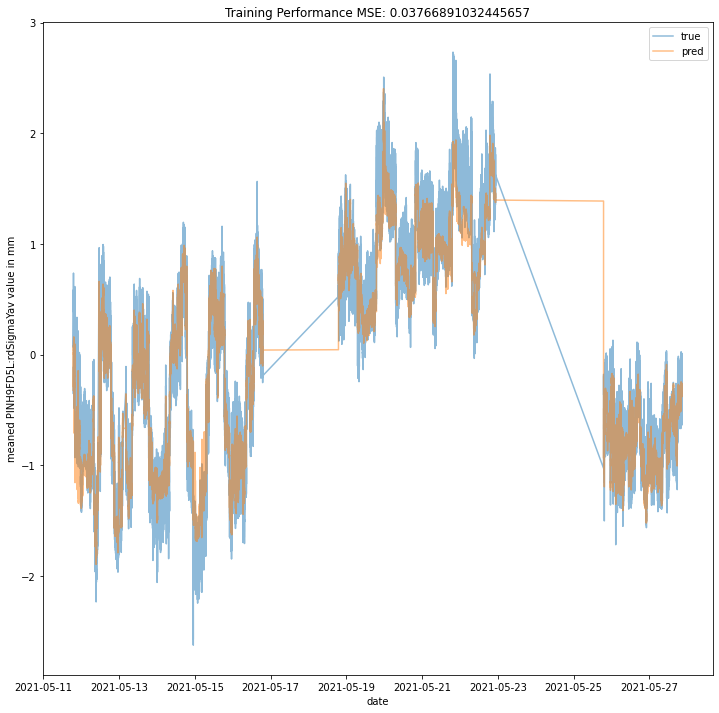

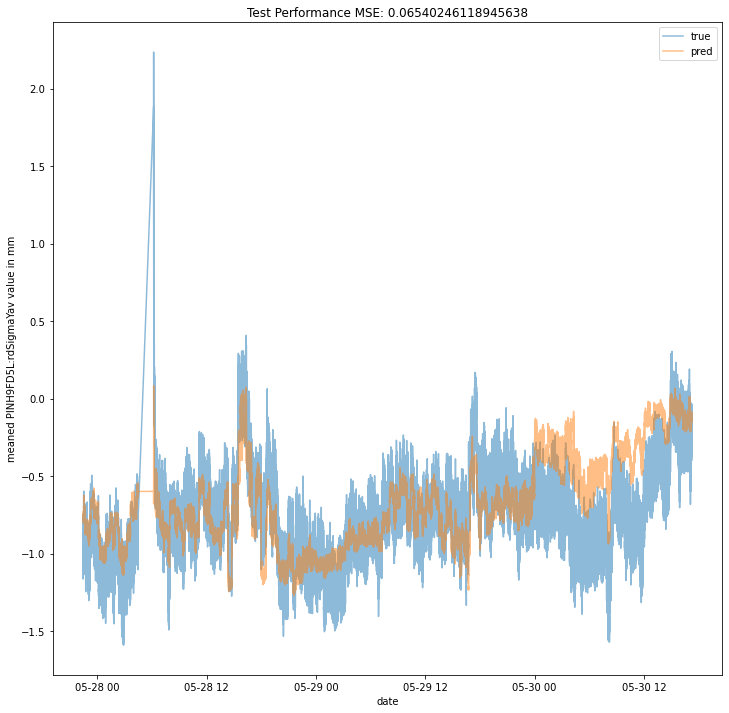

In [3]:
#plotting section
plt.figure(figsize=(12,12))
plt.plot(time_list_train,plt_y_true_train,label="true",alpha=0.5)
plt.plot(time_list_train,plt_y_pred_train,label="pred",alpha=0.5)
plt.legend()
plt.title(f"Training Performance MSE: {training_mse}")
plt.ylabel("meaned PINH9FD5L:rdSigmaYav value in $\mu$m")
plt.xlabel("date")

plt.figure(figsize=(12,12))
plt.plot(time_list_test,plt_y_true_test,label="true",alpha=0.5)
plt.plot(time_list_test,plt_y_pred_test,label="pred",alpha=0.5)
plt.legend()

plt.title(f"Test Performance MSE: {test_mse}")
plt.ylabel("meaned PINH9FD5L:rdSigmaYav value in $\mu$m")
plt.xlabel("date")